## Data Preprocessing for JNJ

In [2]:
import yfinance as yf

### Financial key metrics of JNJ

In [3]:
GetJNJInfo = yf.Ticker("JNJ")

# whole python dictionary is printed here
print(GetJNJInfo.info)

# display Company Sector
print("Company Sector: ",GetJNJInfo.info['sector'])
 
# display Price Earnings Ratio
print("Price Earnings Ratio: ", GetJNJInfo.info['trailingPE'])
 
# display Company Beta
print("Company Beta: ", GetJNJInfo.info['beta'])

{'address1': 'One Johnson & Johnson Plaza', 'city': 'New Brunswick', 'state': 'NJ', 'zip': '08933', 'country': 'United States', 'phone': '732 524 0400', 'website': 'https://www.jnj.com', 'industry': 'Drug Manufacturers - General', 'industryKey': 'drug-manufacturers-general', 'industryDisp': 'Drug Manufacturers - General', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': "Johnson & Johnson, together with its subsidiaries, researches, develops, manufactures, and sells various products in the healthcare field worldwide. The company's Consumer Health segment provides skin health/beauty products under the AVEENO, CLEAN & CLEAR, DR. CI:LABO, NEUTROGENA, and OGX brands; baby care products under the JOHNSON'S and AVEENO Baby brands; oral care products under the LISTERINE brand; TYLENOL acetaminophen products; SUDAFED cold, flu, and allergy products; BENADRYL and ZYRTEC allergy products; MOTRIN IB ibuprofen products; NICORETTE smoking cessati

In [4]:
# retrieve other information
for key, value in GetJNJInfo.info.items():
    print(key, ":", value)

address1 : One Johnson & Johnson Plaza
city : New Brunswick
state : NJ
zip : 08933
country : United States
phone : 732 524 0400
website : https://www.jnj.com
industry : Drug Manufacturers - General
industryKey : drug-manufacturers-general
industryDisp : Drug Manufacturers - General
sector : Healthcare
sectorKey : healthcare
sectorDisp : Healthcare
longBusinessSummary : Johnson & Johnson, together with its subsidiaries, researches, develops, manufactures, and sells various products in the healthcare field worldwide. The company's Consumer Health segment provides skin health/beauty products under the AVEENO, CLEAN & CLEAR, DR. CI:LABO, NEUTROGENA, and OGX brands; baby care products under the JOHNSON'S and AVEENO Baby brands; oral care products under the LISTERINE brand; TYLENOL acetaminophen products; SUDAFED cold, flu, and allergy products; BENADRYL and ZYRTEC allergy products; MOTRIN IB ibuprofen products; NICORETTE smoking cessation products; and PEPCID acid reflux products. This segm

### Historical data

In [7]:
# Import necessary modules
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# download hourly stock prices in the past 730 days (max)
JNJdata = yf.download("JNJ", period='730d', interval='60m')

path1 = 'E:/Desktop/Extracurriculars/Projects & Competitions/DS Guidelight/JNJdata.csv'
isExist = os.path.exists(path1)

if isExist: # load the data if the file exists
    HourlyPrice = pd.read_csv(path1)
    
else: # otherwise, set a path to convert data into a csv file
    SetPath1 = Path(path1)
    SetPath1.parent.mkdir(parents=True, exist_ok=True)  
    JNJdata.to_csv(SetPath1)

[*********************100%%**********************]  1 of 1 completed


### Visually inspect the data

In [ ]:
# Returns the number of rows and columns as a tuple
print(HourlyPrice.shape)

In [ ]:
# view the top of the HourlyPrice table
print(HourlyPrice.head(10))

In [13]:
# look at the statistical charateristics of HourlyPrice
print(HourlyPrice.describe())

              Open         High          Low        Close    Adj Close  \
count  5094.000000  5094.000000  5094.000000  5094.000000  5094.000000   
mean    166.171110   166.585297   165.763691   166.177615   166.177615   
std       7.901555     7.938115     7.868450     7.904942     7.904942   
min     145.270004   145.669998   144.949997   145.270004   145.270004   
25%     160.880028   161.246452   160.481098   160.878750   160.878750   
50%     165.220001   165.695000   164.860001   165.240005   165.240005   
75%     172.337498   172.800003   171.975006   172.360001   172.360001   
max     186.294998   186.690002   185.714996   186.279999   186.279999   

             Volume  
count  5.094000e+03  
mean   9.109451e+05  
std    1.199598e+06  
min    0.000000e+00  
25%    4.816628e+05  
50%    6.650990e+05  
75%    9.645125e+05  
max    3.443829e+07  


In [ ]:
# see if HourlyPrice has null values
print(HourlyPrice.isnull().sum())

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [16]:
# import necessary modules
from sklearn.linear_model import LinearRegression

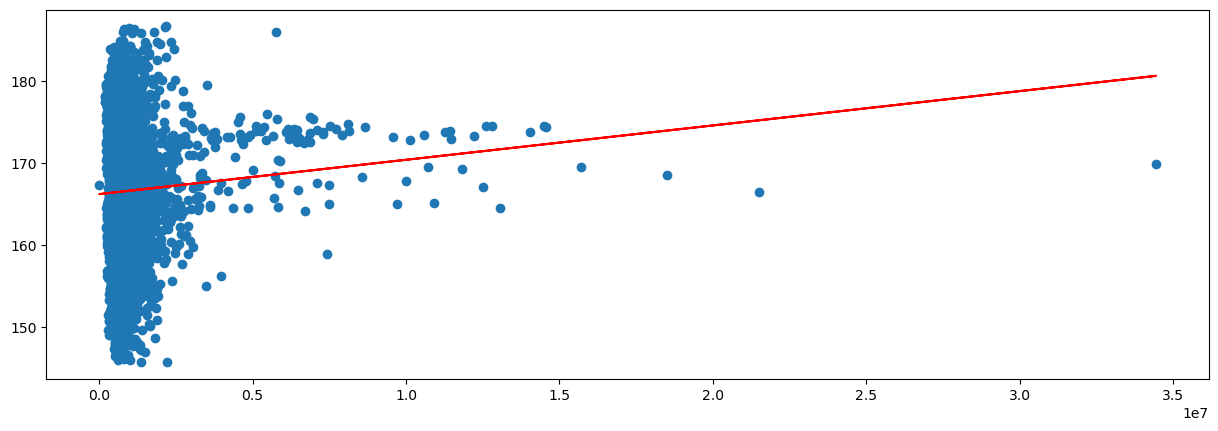

In [31]:
# set x-axis to be volume, y-axis to be high 
x = HourlyPrice[['Volume']]
y = HourlyPrice[['High']]
linear_model = LinearRegression().fit(x, y)

# graph a linear regression plot
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(15)
axes.scatter(x, y)
axes.plot(x, linear_model.predict(x), color='red')
plt.show()

# according to the graph, we need to remove the outliers